![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)
This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Excesso de dados

Já vimos que usar pontos demais para interpolar pode trazer problemas:
ao usar um polinômio de grau muito grande, este pode oscilar demasiadamente;
ao considerar muitos dados com um pouco de erro, este pode ser magnificado pela interpolação.

Entretanto, possuir mais informação deveria nos dar **mais** entendimento sobre o nosso problema, não?
Vamos, aqui, tentar aproveitar estes dados suplementares de outra forma.

# Regressão linear

O primeiro exemplo desta técnica é a regressão linear.
Possuimos dados $(x_i,y_i)$ que estão "quase" alinhados.
Se desejássemos passar um polinômio por todos eles, entretanto, seríamos forçados a ter algo extremamente oscilante.
Mas podemos tentar achar uma reta que esteja "suficientemente perto" de todos (ou _a mais perto_ de todos).

In [37]:
np.random.seed(1)
a,b = np.random.rand(2)
xs = np.linspace(-1,1,30)
ys = a*xs + b + 0.1*np.random.rand(30)
a, b

(0.417022004702574, 0.7203244934421581)

## Exercício, em muitas partes:

### 1) Veja os dados

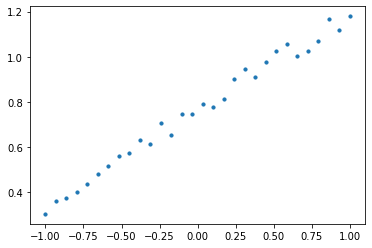

In [38]:
plt.scatter(xs, ys, s=10., label='dados')

### 2) Faça um gráfico do ajuste linear

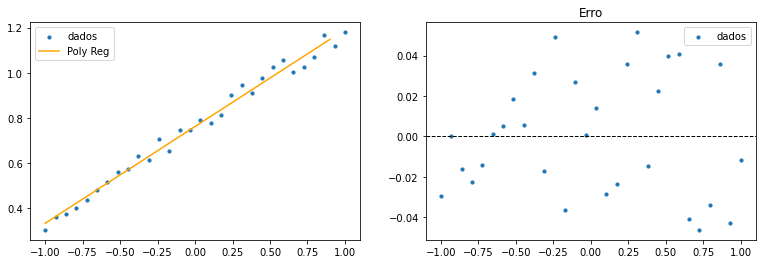

In [39]:
# Estude a função polyfit
v = np.polyfit(xs,ys,deg=1)
### Resposta aqui

def reta(x, coef):
    return coef[0]*x + coef[1]

# Agora, faça o gráfico do ajuste, e do erro
_, [ax1,ax2] = plt.subplots(ncols=2, figsize=(13,4))
### Resposta aqui
ts = np.arange(-1, 1, 0.1)

valores = reta(ts, v)

ax1.scatter(xs, ys, s=10., label='dados')
ax1.plot(ts, valores, color='orange', label='Poly Reg')

erro = ys - reta(xs, v)
ax2.scatter(xs, erro, s=10., label='dados')

ax2.axhline(color='k', linewidth=1, linestyle='--')
ax2.set_title('Erro')

ax1.legend()
ax2.legend()
plt.show()

### 3) Compare com o polinômio interpolador de grau 29

In [40]:
def lagrange_poly(xs, ys, x):
    sum = 0

    for Xi, Yi in zip(xs, ys):
        def lagrange_b(X):
            lagrange = 1

            for Xj in xs:
                if Xi != Xj:
                    lagrange *= (X - Xj) / (Xi - Xj)
            return lagrange

        sum += Yi*lagrange_b(x)
    return sum

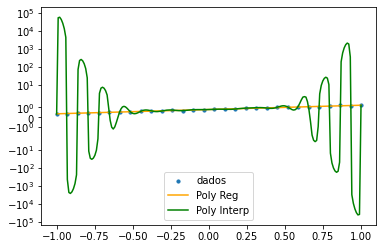

In [41]:
ts = np.linspace(-1,1,200)

### Resposta aqui
valores = reta(ts, v)

plt.scatter(xs, ys, s=10., label='dados')
plt.yscale('symlog')

plt.plot(ts, valores, color='orange', label='Poly Reg')
plt.plot(ts, lagrange_poly(xs, ys, ts), color='green', label='Poly Interp')

plt.legend()
plt.show()

# Regressão polinomial

Podemos generalizar o procedimento que fizemos, e tentar ajustar um polinômio de grau mais alto.
Neste caso, não será provavelmente muito útil, mas vejamos o que acontece!

In [42]:
# Estude a função polyfit e polyval
coefs = np.polyfit(xs,ys,deg=4)
my_poly = np.polyval(coefs, xs)
coefs

array([-0.01791348, -0.00233291, -0.01722607,  0.43059742,  0.77203549])

### 4) Faça novamente um gráfico comparativo!

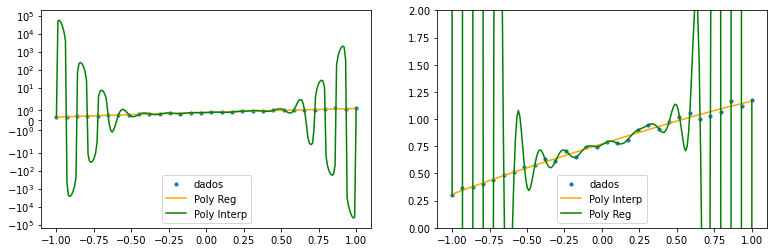

In [43]:
ts = np.linspace(-1,1,200)

_, [ax1, ax2] = plt.subplots(ncols=2, figsize=(13,4))
### Resposta aqui
polinomio = np.polyval(coefs, ts)

ax1.scatter(xs, ys, s=10., label='dados')
ax1.set_yscale('symlog')

ax1.plot(ts, polinomio, color='orange', label='Poly Reg')
ax1.plot(ts, lagrange_poly(xs, ys, ts), color='green', label='Poly Interp')


ax2.scatter(xs, ys, s=10., label='dados')
ax2.plot(ts, polinomio, color='orange', label='Poly Interp')
ax2.plot(ts, lagrange_poly(xs, ys, ts), color='green', label='Poly Reg')
ax2.set_ylim(-0, 2)

ax1.legend()
ax2.legend()

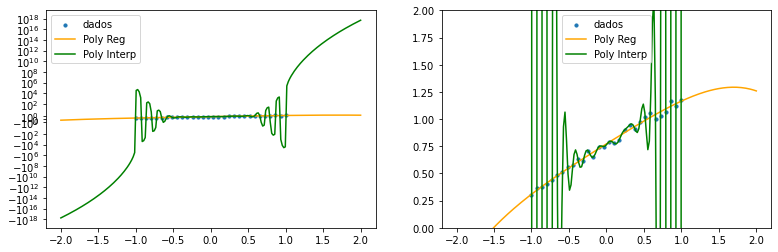

In [44]:
ts = np.linspace(-2,2,200)

_, [ax1, ax2] = plt.subplots(ncols=2, figsize=(13,4))
### Resposta aqui
polinomio = np.polyval(coefs, ts)

ax1.scatter(xs, ys, s=10., label='dados')
ax1.set_yscale('symlog')

ax1.plot(ts, polinomio, color='orange', label='Poly Reg')
ax1.plot(ts, lagrange_poly(xs, ys, ts), color='green', label='Poly Interp')


ax2.scatter(xs, ys, s=10., label='dados')

ax2.plot(ts, polinomio, color='orange', label='Poly Reg')
ax2.plot(ts, lagrange_poly(xs, ys, ts), color='green', label='Poly Interp')
ax2.set_ylim(-0, 2)
ax2.set_yticks([i for i in np.arange(0, 2.1, 0.25)])

ax1.legend()
ax2.legend()

# Modelos lineares gerais

O que está por trás da função `polyfit` é que temos um modelo que é _linear_ nos parâmetros que desejamos encontrar.
Um modelo pode ser pensado numa função $M_{par}(x)$, que dá uma aproximação para os pontos $(x_i, y_i)$.
Em geral, emprega-se uma notação como $y \sim M_{par}(x)$.

Por exemplo, se temos um modelo polinomial, os parâmetros são os coeficientes $p_i$ do polinômio,
e portanto $M_{par}(x) = \sum_{i=0}^d p_i x^i$.

Quando o modelo é linear nos parâmetros, ao escrevermos as 30 equações $M_{par}(x_k) = y_k$,
obtemos um sistema linear $A \cdot par = y$.
Se temos tantos parâmetros como equações (ou mais!), é razoável esperar que o sistema terá solução.
Mas, nos casos acima, estamos na situação exatamente oposta:
temos (muito!) menos variáveis do que equações,
e o sistema será, muito provavelmente, impossível.

Entretanto, podemos tentar encontrar coeficientes que sejam os "melhores possível"
segundo algum critério.
Um critério bastante comum e prático (ou seja, rápido para o computador executar)
é o de mínimos quadrados:

$$ \text{tomaremos $c$ tal que } \left\| Ac - y \right\| \text{ seja o menor possível.} $$

Para minimizar $\left\| Ac - y \right\|$, vamos minimizar o quadrado, o que torna o problema mais fácil, já que:

$$ \left\| Ac - y \right\|^2 = \langle Ac - y, Ac - y \rangle = c^T (A^T A) c - 2 c^T Ay + y^T y. $$

Derivando em relação a $c$, obtemos as chamadas equações normais:

$$ A^T A c = A^T y,$$

que agora formam um sistema com tantas equações quanto a dimensão de $c$.

## Exemplo: um modelo misto

Vamos criar "dados artificiais" para um modelo contendo tanto uma componente senoidal como uma exponencial e uma constante.
Depois, veremos como uma abordagem de mínimos quadrados se comporta.

Modelo artificial: $y \sim A \sin(2\pi t) + Be^{\lambda(t-1950)} + C$, com $\lambda = 0.03$.

In [45]:
# parâmetros
A = 20
B = 10
C = 150
l = 0.03

In [46]:
# dados artificiais
ts = np.arange(1950,2010,1/12)
ys = A*np.sin(2*np.pi*ts) + B*np.exp(l*(ts-1950)) + C

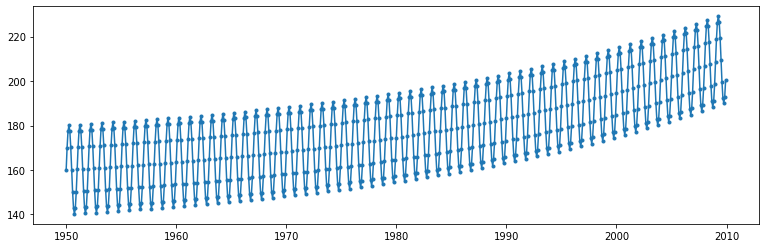

In [47]:
plt.figure(figsize=(13,4))
plt.plot(ts, ys, '.-')
plt.show()

### Exercício

Faça uma função que monta a matriz correspondente ao modelo.

In [48]:
def model_M(ts):
    # Retorna a matriz do sistema linear
    ### Resposta aqui
    Matriz_resposta = []

    for t in ts:
        linha = [np.sin(2*np.pi*t), np.exp( l * (t-1950)), 1]
        Matriz_resposta.append(linha)
    
    Matriz_resposta = np.array(Matriz_resposta)
    return Matriz_resposta.T

In [49]:
M = model_M(ts)
M.shape

(3, 720)

E agora, encontre os parâmetros da série!

In [50]:
def model_par(ts,ys):
    # Calcula os parâmetros para os dados (t_i, y_i), resolvendo o sistema linear
    M = model_M(ts)
    ### Resposta aqui
    ProdDireito = (M @ (M.T))
    ProdEsquerdo = M @ ys

    return np.linalg.solve(ProdDireito, ProdEsquerdo)


In [51]:
model_par(ts, ys)

array([ 20.,  10., 150.])

# Dados reais!

Dados de emissão de $CO_2$, medidos em Mauna Loa.

In [52]:
dados = np.load('mounaloa.npz')
ts, ys = dados['ts'], dados['ys']

### Um modelo intermediário

Aqui, precisaríamos também estimar o $\lambda$.
Isso é relativamente complicado, e vamos começar aproximando a exponencial por um polinômio de grau 1.
Isso dá o seguinte modelo:

$$y \sim B\sin(2\pi t) + A(t-1959) + C. $$

In [53]:
def model_M(ts):
    # Monte a matriz
    ### Resposta aqui
    Matriz_resposta = []

    for t in ts:
        linha = [np.sin(2*np.pi*t), (t-1959), 1]
        Matriz_resposta.append(linha)
    
    Matriz_resposta = np.array(Matriz_resposta)
    return Matriz_resposta.T

def model_par(ts,ys):
    M = model_M(ts)
    MMt = np.matmul(M,M.T)
    return np.linalg.solve(MMt, np.dot(M,ys))

In [54]:
def model_fun(par):
    B,A,C = par
    def mf(t):
        # Função que avalia o modelo no tempo t
        ### Resposta aqui
        return B*np.sin(2*np.pi*t) + A*(t - 1959) + C
    return mf

In [55]:
par = model_par(ts, ys)
mf = model_fun(par)
print(par)

[  2.77243676   1.31089805 311.5456345 ]


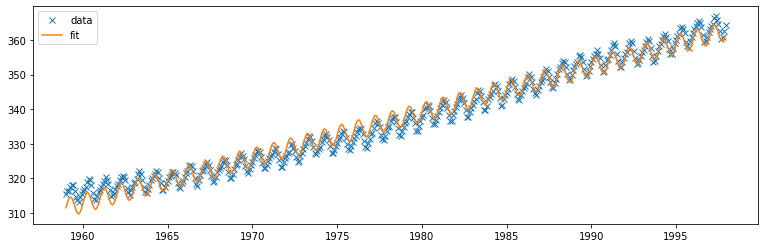

In [56]:
plt.figure(figsize=(13,4))

plt.plot(ts, ys, 'x', label='data')
plt.plot(ts, mf(ts), label='fit')
plt.legend()
plt.show()

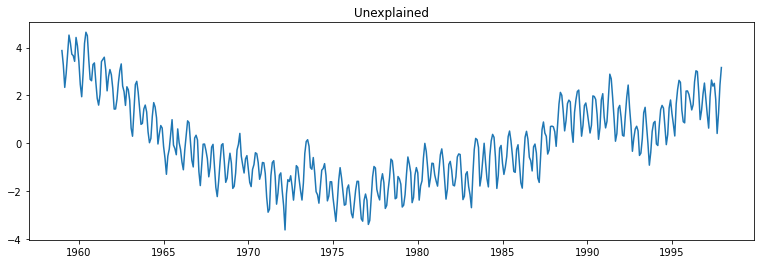

In [57]:
plt.figure(figsize=(13,4))

plt.plot(ts, ys - mf(ts))
plt.title('Unexplained')
plt.show()

### Um modelo com mais parâmetros:

Vamos tentar ajustar melhor:
- introduzindo um termo $\cos(2\pi t)$,
- e aproximando a exponencial por um polinômio de grau 2.

Fica melhor?

In [58]:
def model_M(ts):
    # Monte a matriz
    ### Resposta aqui
    Matriz_resposta = []

    for t in ts:
        linha = [np.sin(2*np.pi*t), np.cos(2*np.pi*t), (t-1950), ((t-1950)**2) / 2, 1]
        Matriz_resposta.append(linha)
    
    Matriz_resposta = np.array(Matriz_resposta)
    return Matriz_resposta.T

def model_par(ts,ys):
    M = model_M(ts)
    MMt = np.matmul(M,M.T)
    return np.linalg.solve(MMt, np.dot(M,ys))

In [59]:
def model_fun(par):
    B,B_,A,A_,C = par
    def mf(t):
        # Função que avalia o modelo no tempo t
        ### Resposta aqui
        return B*np.sin(2*np.pi*t) + B_*np.cos(2*np.pi*t) + A*(t - 1950) + A_*((t-1950)**2) / 2  + C
    return mf

In [60]:
par = model_par(ts, ys)
mf = model_fun(par)
print(par)

[ 2.77272785e+00 -3.90173283e-01  5.84155973e-01  2.55325623e-02
  3.08472187e+02]


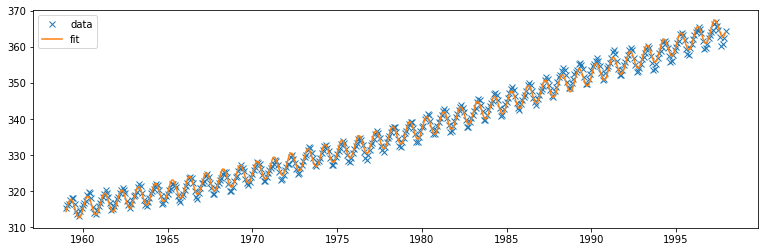

In [61]:
plt.figure(figsize=(13,4))

plt.plot(ts, ys, 'x', label='data')
plt.plot(ts, mf(ts), label='fit')
plt.legend()
plt.show()

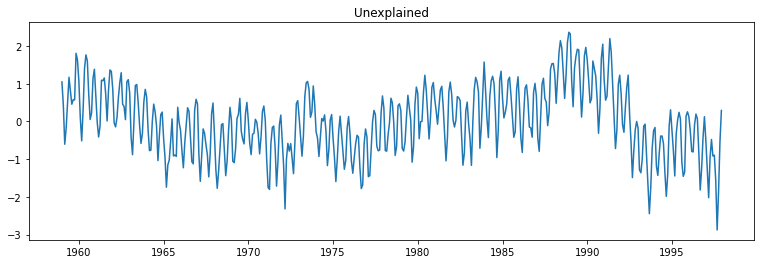

In [62]:
plt.figure(figsize=(13,4))

plt.plot(ts, ys - mf(ts))
plt.title('Unexplained')
plt.show()